<a href="https://colab.research.google.com/github/barnabasp/ML_Course/blob/main/hw11_bporfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import metrics

# HW 11.

* Running the models may take minutes. This HW takes ~30 min to complete in computational time, so make sure you don't start it 1 hour before it is due.

* Tasks 2-4. should be done using the `sklearn` library, the last is a pure TensorFlow ([Keras is part of TensorFlow](https://github.com/keras-team/keras/releases#:~:text=since%20this%20release-,Keras%202.2.,well%20as%20Theano%20and%20CNTK)) example.

  * Never do `import keras` it only references `tf.keras` since version `2.4.0`!

* The example notebook was run in Google COLAB without any package installation. I advise you to use Google COLAB with a GPU instance for the last task.

## 1. Load the CIFAR 10 dataset from the `tf.keras.datasets` API and train a `LogisticRegression` model on the dataset and predict all test outcomes with the `sklearn` API

* Create an image grid visualization of randomly selected images (9, 16) with labels.
* Preprocess the dataset for `sklearn`, scale [0-1], and also flatten each example to a vector.
* Use the `multi_class='multinomial'` option, describe what it means.
* Plot the ROC curves and AUC scores on the same figure.
* Calculate the accuracy of the classifier on the test set.

* Make your life easier - time is precious - and run all the algorithms with multiprocessing.

Hint:

* `from sklearn.preprocessing import LabelBinarizer` might be useful for you.




In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [13]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
print(X_train.min(), X_train.max())
print(np.unique(y_train))

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)
0 255
[0 1 2 3 4 5 6 7 8 9]


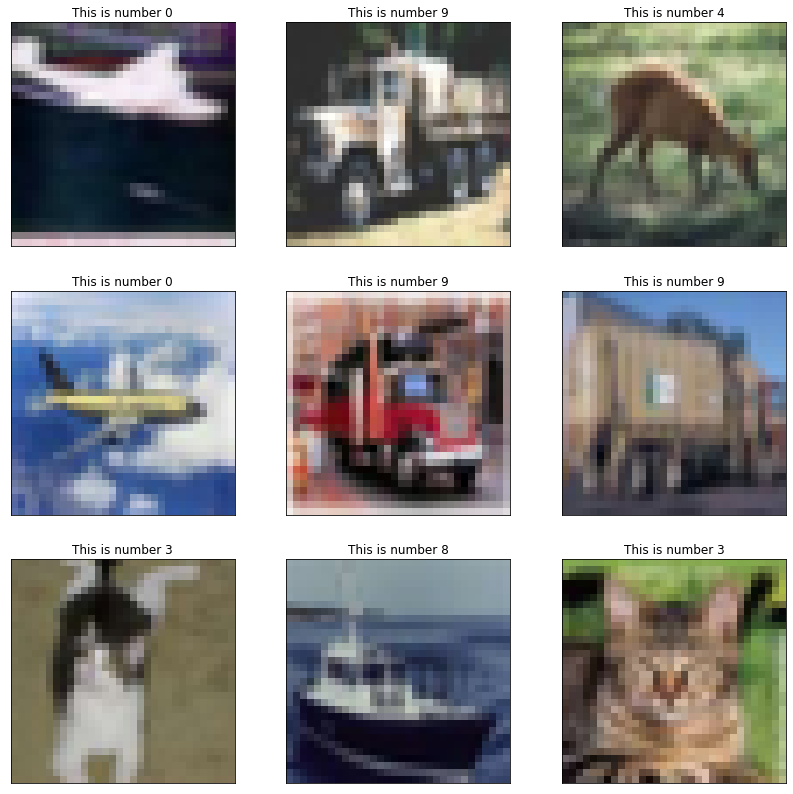

In [12]:
idx = [x for x in range(len(X_train))] #load up the indices , maybe not the best
random.shuffle(idx)
nrows, ncols =3, 3
fig, ax = plt.subplots(nrows,ncols,figsize=(14,14))
for i in range(ncols):
    for j in range(nrows):
        idxs = idx[i+j*ncols]
        image = X_train[idxs].reshape(32,32,3)
        ax[i,j].imshow(image)
        ax[i,j].set_title('This is number %i'%y_train[idxs])
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])

In [44]:
x_train = X_train.reshape(50000, 32*32*3)/255
x_test = X_test.reshape(10000, 32*32*3)/255
y_test_bin = LabelBinarizer().fit_transform(y_test)
label_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [66]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2299.998
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs
bogomips	: 4599.99
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	:

In [21]:
clf = LogisticRegression(multi_class='multinomial', n_jobs=2).fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Multinomial is simply enables the logistic regression to be able to predict multi classes instead of binary classes (one vs all)

In [56]:
ypred11 = clf.predict_proba(x_test)
ypred21 = clf.predict(x_test)

In [63]:
def plotROCAUC(ytest_oh, y_pred):
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(np.shape(ytest_oh)[1]):
      fpr[i], tpr[i], _ = metrics.roc_curve(ytest_oh[:,i], y_pred[:, i])
      roc_auc[i] = metrics.auc(fpr[i], tpr[i])
  plt.figure(figsize=(15,15))
  for i in range(np.shape(ytest_oh)[1]):
      plt.plot(fpr[i],tpr[i], label='ROC Curve %s, AUC: %.3f' %(label_names[i],roc_auc[i]))
  plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
  plt.xlabel('False Positive Rate', fontsize=20)
  plt.ylabel('True Positive Rate',fontsize=20)
  plt.title('Receiver operating characteristic curve - Multiclass',fontsize=20)
  plt.ylim(0.0,1.0)
  plt.legend(fontsize=20)
  plt.show()

In [57]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(np.shape(y_test_bin)[1]):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_bin[:,i], ypred11[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

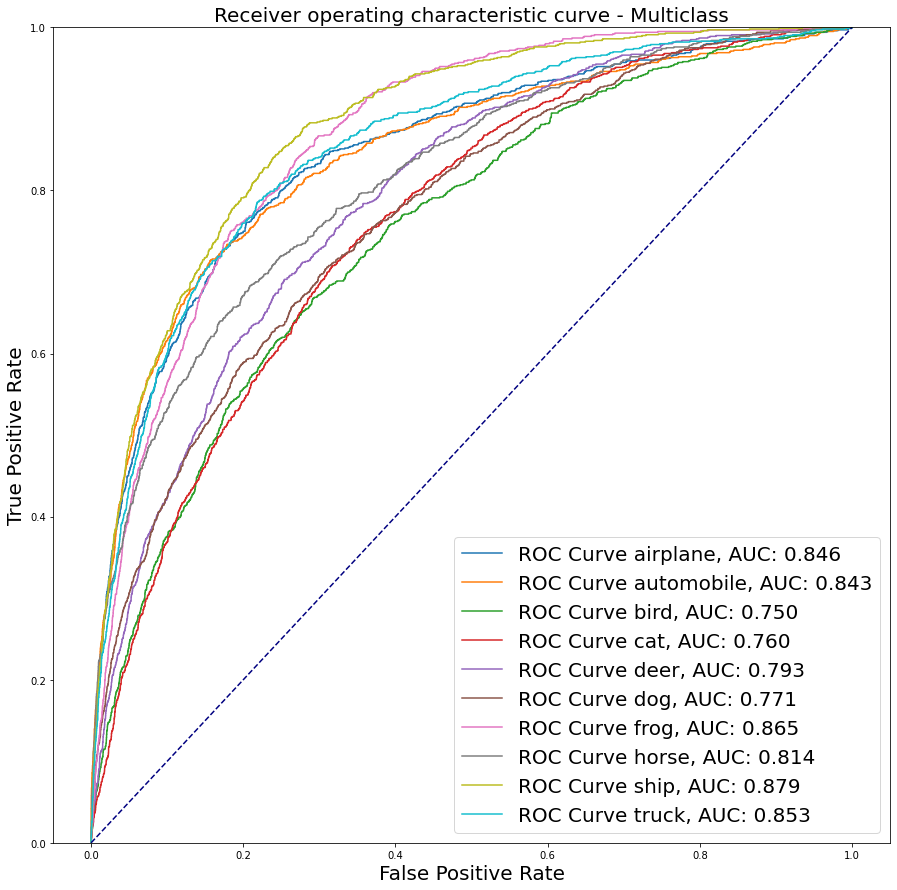

In [58]:
plt.figure(figsize=(15,15))
for i in range(np.shape(y_test_bin)[1]):
    plt.plot(fpr[i],tpr[i], label='ROC Curve %s, AUC: %.3f' %(label_names[i],roc_auc[i]))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate', fontsize=20)
plt.ylabel('True Positive Rate',fontsize=20)
plt.title('Receiver operating characteristic curve - Multiclass',fontsize=20)
plt.ylim(0.0,1.0)
plt.legend(fontsize=20)
plt.show()

In [59]:
metrics.accuracy_score(y_test,ypred21)

0.4063

Simply running the accuracy from SKLearn for the non probabilistic prediction yields around 40% accuracy

## 2. Train an `SGDClassifier` regression model on the dataset and predict all the test outcomes with the `sklearn` API. 

* Select the appropiate loss for this task, explain what this means.
* Time is precious, run multiple jobs at the same time.
* Plot the ROC curves and AUC scores on the same figure for the test set.
* Calculate the accuracy of the classifier.
* Why is this worse than the previous model?
* Describe the above model with your own words, how is it different than the logistic regression model?



In [54]:
from sklearn.linear_model import SGDClassifier

Using logistic regression here in order to get predict_proba enabled. Alternatively I checked out the modified huber as well:https://scikit-learn.org/stable/modules/sgd.html#sgd-mathematical-formulation

In [62]:
clf2 = SGDClassifier(n_jobs=2,loss='log').fit(x_train, y_train) #logistic regression
clf22 = SGDClassifier(n_jobs=2,loss='modified_huber').fit(x_train, y_train) #kinda like SVM

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [67]:
ypred12 = clf2.predict_proba(x_test)
ypred22 = clf2.predict(x_test)
ypred122 = clf22.predict_proba(x_test)
ypred222 = clf22.predict(x_test)

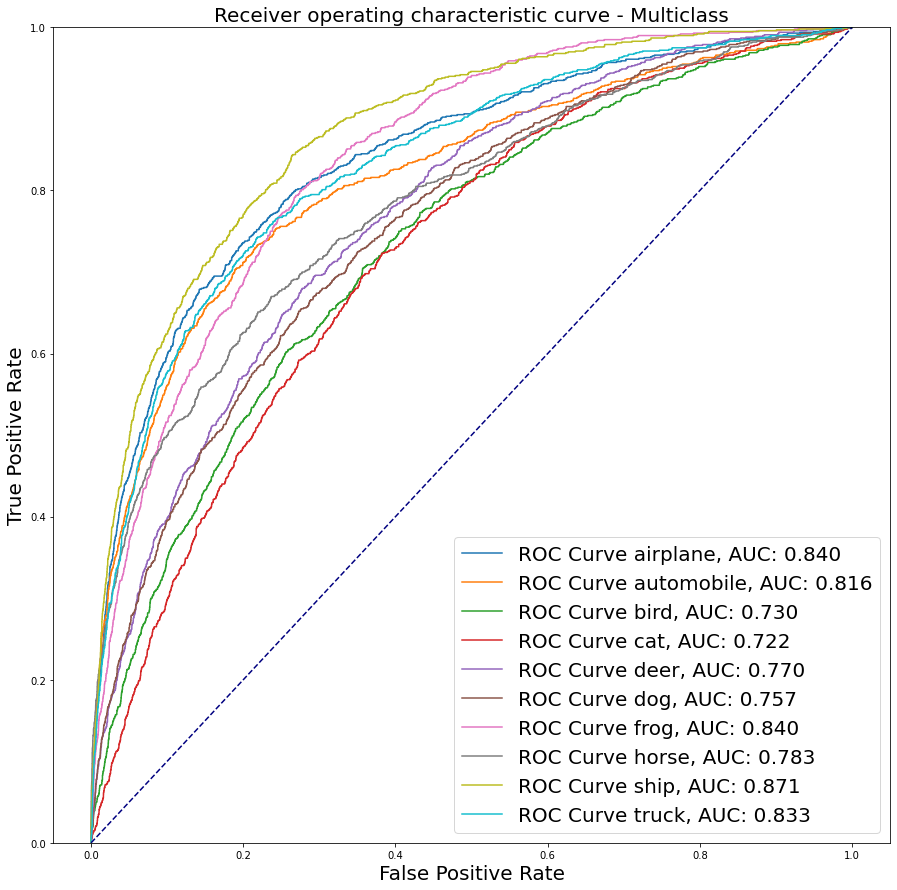

In [65]:
plotROCAUC(y_test_bin, ypred12)

In [69]:
metrics.accuracy_score(y_test,ypred22)

0.3706

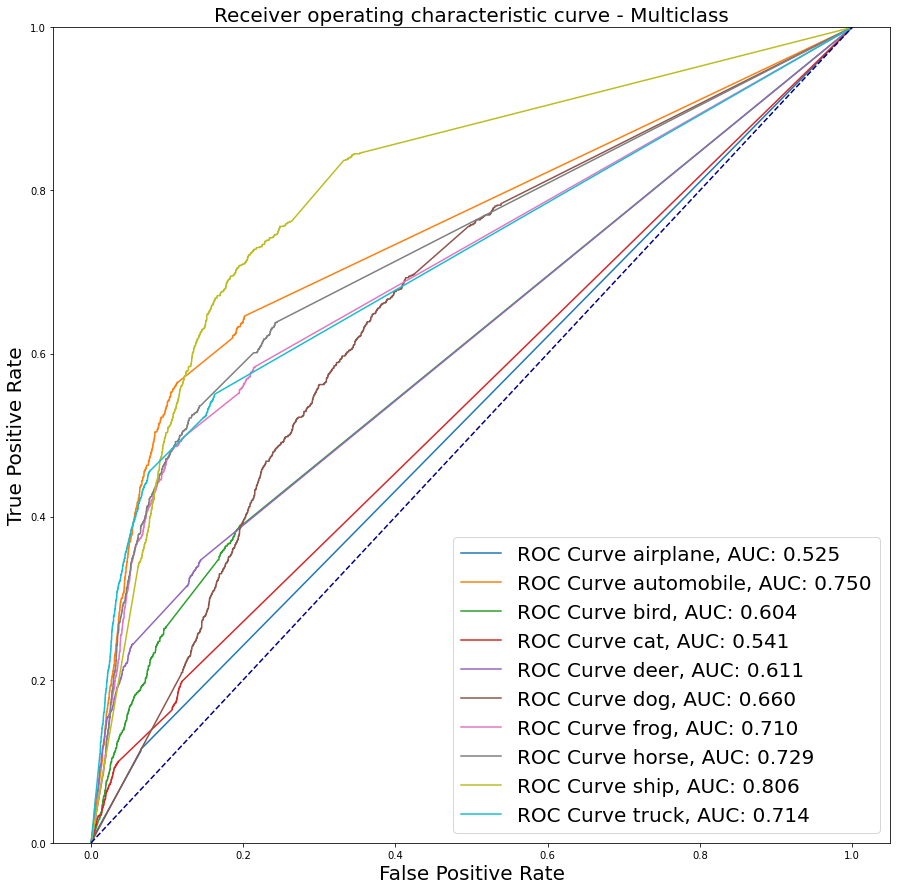

In [68]:
plotROCAUC(y_test_bin, ypred122)

In [70]:
metrics.accuracy_score(y_test,ypred222)

0.3011

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
https://datascience.stackexchange.com/questions/37941/what-is-the-difference-between-sgd-classifier-and-the-logisitc-regression

Basically both SGD and Logit Reg is a linear classifier. Simply SGDClassifier is a linear classifier optimized by SGD, this minimizes, optimizes. In this case I tried with Logistic Regression and it came pretty close to LogReg in 1st exercise, but Modified Huber is kinda like an SVM and it performs 10\% worse

## 3. Train a RandomForest classifier

* Plot the ROC curve with AUC scores on the test set.
* Calculate accuracy of the classifier on the test set.
* Time is precious, run multiple jobs at the same time.



In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
clf_3 = RandomForestClassifier(n_jobs=2).fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


In [74]:
ypred13 = clf_3.predict_proba(x_test)
ypred23 = clf_3.predict(x_test)

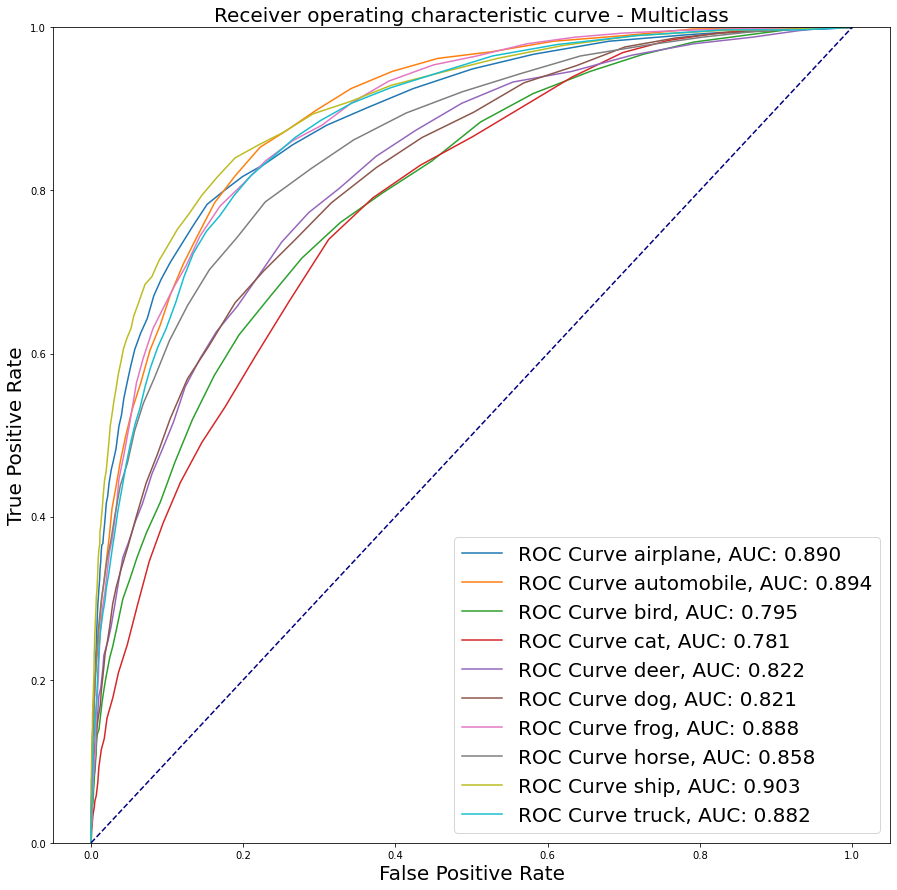

In [76]:
plotROCAUC(y_test_bin, ypred13)

In [77]:
metrics.accuracy_score(y_test,ypred23)

0.4657

## 4. Train an multi layer perceptron classifier

* use the `MLPClassifier` from `sklearn`
* Set its parameter to `max_iter = 30` or if you have time, set it for at least `100`. After `30` iterations the model does not converge but gives reasonable predictions (with default parameters).
* Plot the ROC curves with AUC scores for the test set.
* Calculate the accuracy of the model on the test set.

In [78]:
from sklearn.neural_network import MLPClassifier


## 5. Train a ResNet50 CNN model on the dataset, utilize pre-trained weights and fine-tune for at least 3 epochs:

* training for 3 epochs should be enough to prove that this model is superior compared to others, train longer and you'll see exceptional results

Convert the dataset:

```python
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(32)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(32)
```

Hints:

* loading a pretrained model and letting its parameters be tunable

```python
backbone = tf.keras.applications.YOUR_MODEL_OF_CHOICE
backbone.trainable = True # DO NOT FORGET TO UNFREEZE IT
```

* defining your custom model with the pretrained backbone

```python
# YOUR_MODEL_OF_CHOICE here is ResNet50 (!) as described in the task description.

# Functional TensorFlow API
def my_own_model():
  input_placeholder = tf.keras.layers.Input(shape=(32, 32, 3))
  # DO NOT FORGET THE PROPER INPUT PREPROCESSING FOR THE BACKBONE
  x = tf.keras.applications.YOUR_MODEL_OF_CHOISE.preprocess_input(PROPER_INPUT)
  # PLEASE USE THE PROPER INPUT: (e.g. 8 bit input)
  x = backbone(x)
  # Here comes some more layers
  # and flattening at the end if needed!
  out = # layer outputting the specified number of classes
        # with or without a softmax activation, later on
        # the choice of the loss depends on this
  model = tf.keras.models.Model(inputs=inp, outputs=out)
  return model
```